<a href="https://colab.research.google.com/github/kgy1008/Data-Science-Analysis/blob/main/week14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#금융 데이터를 가져오고 분석하는 데 사용되는 도구 설치하기
!pip install finance_datareader

In [ ]:
import FinanceDataReader as fdr

In [ ]:
#FinanceDataReader 패키지를 사용하여 NASDAQ(미국의 한 증권 거래소)에 상장된 주식에 대한 정보를 가져오기
df=fdr.StockListing('NASDAQ')
df.head(20)

100%|██████████| 3943/3943 [00:23<00:00, 165.28it/s]


,Symbol,Name,IndustryCode,Industry
0,AAPL,Apple Inc,57106020,전화 및 소형 장치
1,MSFT,Microsoft Corp,57201020,소프트웨어
2,AMZN,Amazon.com Inc,53402010,백화점
3,NVDA,NVIDIA Corp,57101010,반도체
4,GOOGL,Alphabet Inc Class A,57201030,온라인 서비스
5,META,Meta Platforms Inc,57201030,온라인 서비스
6,GOOG,Alphabet Inc Class C,57201030,온라인 서비스
7,TSLA,Tesla Inc,53101010,자동차 및 트럭 제조
8,AVGO,Broadcom Inc,57101010,반도체
9,ADBE,Adobe Inc,57201020,소프트웨어


In [ ]:
# 'NVIDIA Corp'인 행을 선택
df[df.Name=='NVIDIA Corp']

,Symbol,Name,IndustryCode,Industry
3,NVDA,NVIDIA Corp,57101010,반도체


In [ ]:
#'NVDA' 주식에 대한 가격 데이터를 2020년부터 2022년까지 가져오기
df=fdr.DataReader('NVDA','2020','2023')

In [ ]:
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2022-12-23,151.960007,153.389999,148.830002,152.005920,34932600
2022-12-27,150.740005,151.000000,140.559998,141.159790,46490200
2022-12-28,139.270004,142.619995,138.839996,140.310074,35106600
2022-12-29,144.020004,146.830002,142.270004,145.978073,35492300
2022-12-30,143.339996,146.289993,142.330002,146.088028,31049000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 756 entries, 2020-01-02 to 2022-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    756 non-null    float64
 1   High    756 non-null    float64
 2   Low     756 non-null    float64
 3   Close   756 non-null    float64
 4   Volume  756 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 35.4 KB


In [ ]:
#월별 데이터의 평균으로 다운 샘플링하여 저장하기
df_month=df.resample("BM").mean()
df_month.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-01-31,61.182024,61.811548,60.434167,60.970345,2.916863e+07
2020-02-28,67.050000,68.891448,66.039737,67.479544,6.236133e+07
2020-03-31,60.518183,63.079205,58.258636,60.692793,7.169978e+07
2020-04-30,69.391666,70.897620,67.797381,69.026946,5.370621e+07
2020-05-29,81.483000,83.311125,79.973375,81.575510,6.274438e+07


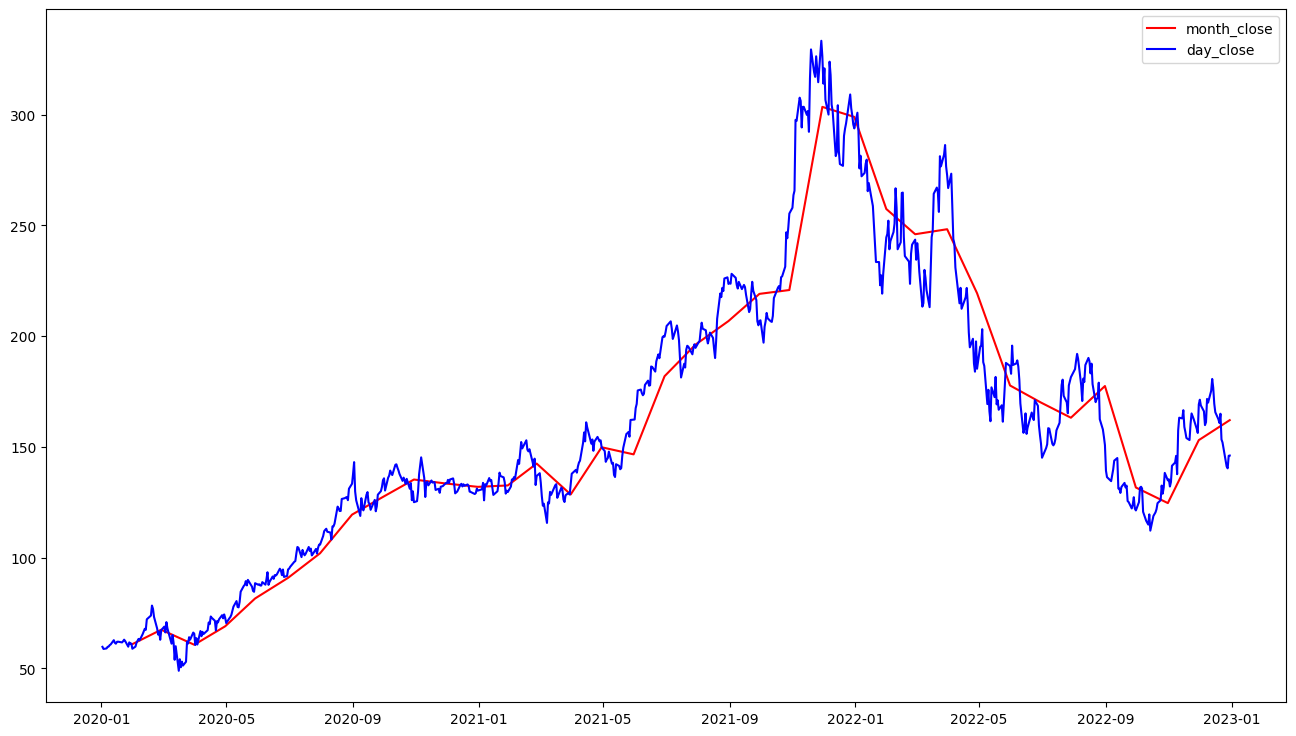

In [ ]:
#월별 평균을 시각화로 확인하기
import matplotlib.pyplot as plt
plt.figure(figsize=(16,9))
plt.plot(df_month['Close'],color='red',label='month_close')
plt.plot(df['Close'],color='blue', label='day_close')
plt.legend() #그래프 합침

In [ ]:
#월별 수익률 구하기 : pct_change()사용
df_month['rtn']=df_month['Close'].pct_change()
df_month

,Open,High,Low,Close,Volume,rtn
Date,,,,,,
2020-01-31,61.182024,61.811548,60.434167,60.970345,2.916863e+07,NaN
2020-02-28,67.050000,68.891448,66.039737,67.479544,6.236133e+07,0.106760
2020-03-31,60.518183,63.079205,58.258636,60.692793,7.169978e+07,-0.100575
2020-04-30,69.391666,70.897620,67.797381,69.026946,5.370621e+07,0.137317
2020-05-29,81.483000,83.311125,79.973375,81.575510,6.274438e+07,0.181792
2020-06-30,91.100909,92.442727,89.457386,90.900989,4.417938e+07,0.114317
2020-07-31,102.068409,103.709318,100.466932,101.983691,3.679296e+07,0.121921
2020-08-31,118.995714,121.199642,117.377024,119.420910,4.605973e+07,0.170980
2020-09-30,128.181072,131.072977,124.355953,127.415855,7.550739e+07,0.066948


In [ ]:
#주가 흐름 파악학기: rolling()

이동평균선은 과거 주식 가격 흐름을 바탕으로 앞으로의 주식 가격을 예측하는데 사용하는 선이다. 일정 기간 동안의 주식 가격 흐름을 평균을 내서 그 선을 연결하는 것으로 생각하면 이해하기 쉽다. 만약 5일 이동평균선이라고 하면 최근 5일간의 주가를 종가 기준으로 합하여 5로 나눠 평균을 구하는 것이다. 판다스에서 제공하는 rolling()을 사용하면 이러한 이동평균선을 쉽게 구할 수 있다. 여기서 df_month 데이터프레임은 한 달 단위로 집약시킨 데이터이다. rolling(2).mean()을 사용해서 2달씩 종가의 평균을 구할 수 있다.

In [ ]:
df_month['MA'] = df_month['Close'].rolling(2).mean()
df_month.head()

,Open,High,Low,Close,Volume,rtn,MA
Date,,,,,,,
2020-01-31,61.182024,61.811548,60.434167,60.970345,2.916863e+07,NaN,NaN
2020-02-28,67.050000,68.891448,66.039737,67.479544,6.236133e+07,0.106760,64.224945
2020-03-31,60.518183,63.079205,58.258636,60.692793,7.169978e+07,-0.100575,64.086168
2020-04-30,69.391666,70.897620,67.797381,69.026946,5.370621e+07,0.137317,64.859869
2020-05-29,81.483000,83.311125,79.973375,81.575510,6.274438e+07,0.181792,75.301228


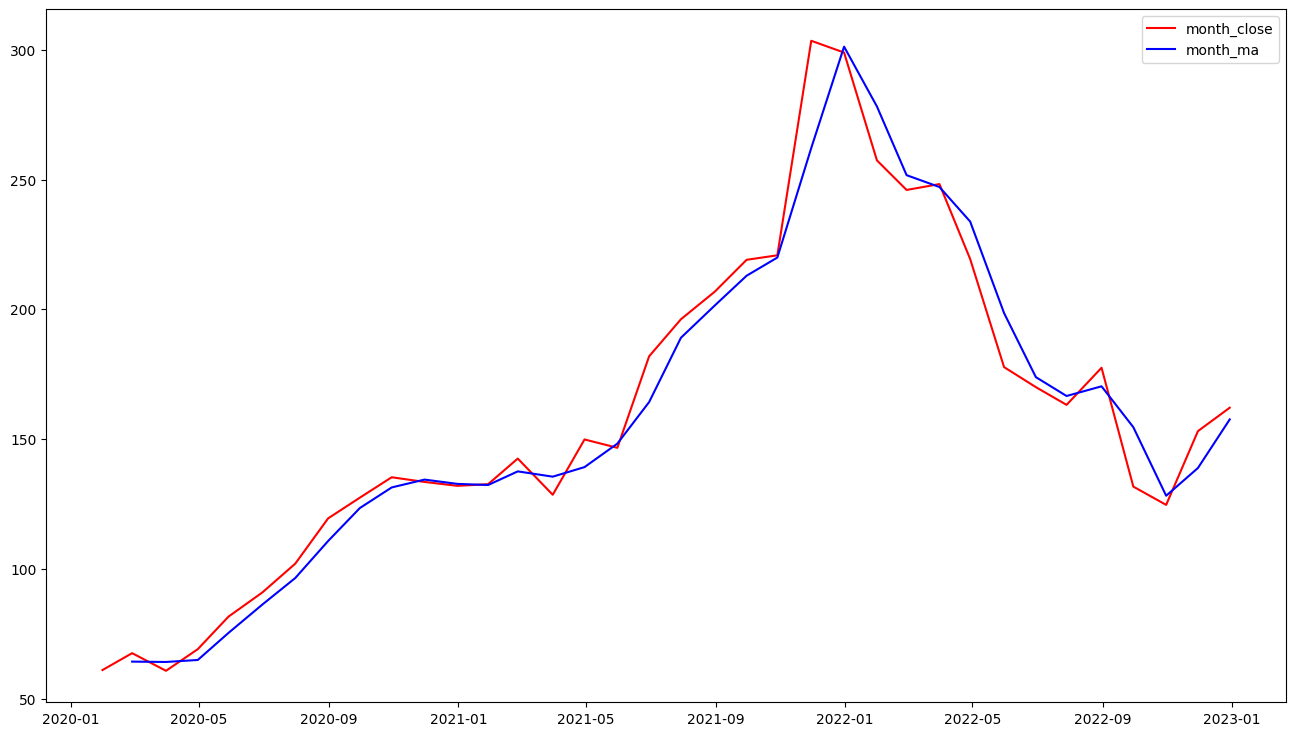

In [ ]:
#df_month의 종가와 이동평균선(MA)을 시각화하기
import matplotlib.pyplot as plt
plt.figure(figsize=(16,9))
plt.plot(df_month['Close'],color='red',label='month_close')
plt.plot(df_month['MA'],color='blue', label='month_ma')
plt.legend() #그래프 합침

In [ ]:
#3개월 이동평균선을 구해 'MA1'컬럼에 추가하고 Close,MA,MA1을 그래프로 시각화해보자
df_month['MA1']=df_month['Close'].rolling(3).mean()
df_month.head()

,Open,High,Low,Close,Volume,rtn,MA,MA1
Date,,,,,,,,
2020-01-31,61.182024,61.811548,60.434167,60.970345,2.916863e+07,NaN,NaN,NaN
2020-02-28,67.050000,68.891448,66.039737,67.479544,6.236133e+07,0.106760,64.224945,NaN
2020-03-31,60.518183,63.079205,58.258636,60.692793,7.169978e+07,-0.100575,64.086168,63.047561
2020-04-30,69.391666,70.897620,67.797381,69.026946,5.370621e+07,0.137317,64.859869,65.733094
2020-05-29,81.483000,83.311125,79.973375,81.575510,6.274438e+07,0.181792,75.301228,70.431750


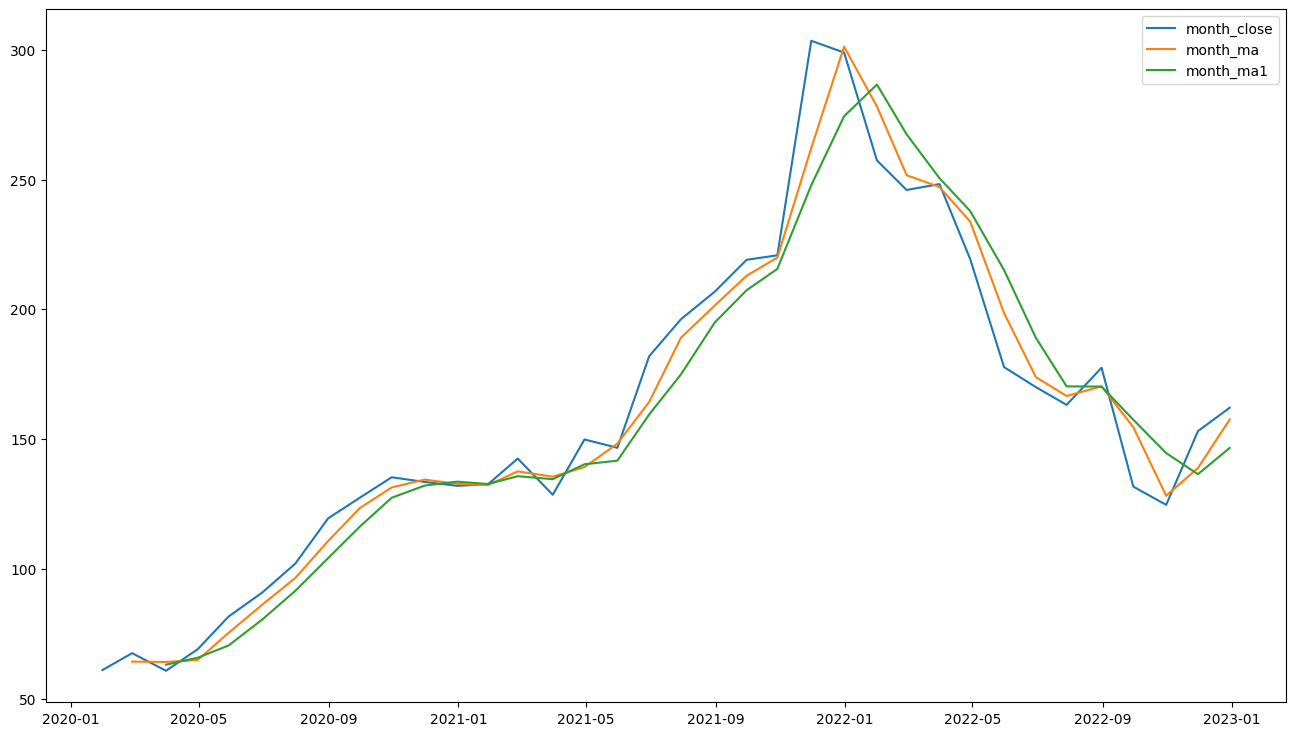

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,9))
plt.plot(df_month['Close'],label='month_close')
plt.plot(df_month['MA'],label='month_ma')
plt.plot(df_month['MA1'],label='month_ma1')
plt.legend()

In [ ]:
#최근 종가를 가져와 이동평균선과 비교를 통해 상승장인지 하락장인지 판단해 보자.
last_close=df_month['MA'].iloc[-1] #최근 두달
print(last_close)
price= df['Close'].iloc[-1] #오늘 종가
print(price)
if last_close < price :
  print('상승 장')
elif last_close > price :
  print('하락 장')
else:
  print('변화 없음')

157.55539816666666
146.088028
하락 장


# 국내 주식 정보 fdr.StockListing('KRX')

In [ ]:
df_kr=fdr.StockListing('KRX')
df_kr.head(20)

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,72200,2,-600,-0.82,72400,72500,71700,4112853,296401161300,431018300110000,5969782550,STK
1,373220,KR7373220003,LG에너지솔루션,KOSPI,,431500,2,-23000,-5.06,444000,448000,429000,219822,95152264000,100971000000000,234000000,STK
2,000660,KR7000660001,SK하이닉스,KOSPI,,131600,2,-2300,-1.72,132200,133000,131200,1370865,180838063300,95805111234000,728002365,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,722000,2,-3000,-0.41,725000,726000,718000,6848,4939262000,51387628000000,71174000,STK
4,005935,KR7005931001,삼성전자우,KOSPI,,57800,2,-100,-0.17,58000,58000,57600,252356,14585893600,47562851260000,822886700,STK
5,005490,KR7005490008,POSCO홀딩스,KOSPI,,475000,2,-8000,-1.66,483000,483000,469500,209752,99550978000,40171334250000,84571230,STK
6,005380,KR7005380001,현대차,KOSPI,,182400,2,-1900,-1.03,183300,183400,181700,115405,21050495600,38583346694400,211531506,STK
7,051910,KR7051910008,LG화학,KOSPI,,492500,2,-8500,-1.70,499500,501000,487000,95678,47053513500,34766728927500,70592343,STK
8,000270,KR7000270009,기아,KOSPI,,84900,2,-1000,-1.16,84800,85300,84400,251312,21276582000,34133552834700,402044203,STK
9,035420,KR7035420009,NAVER,KOSPI,,208000,3,0,0.00,208000,210000,204000,267893,55392331500,33780987552000,162408594,STK


In [ ]:
#자신이 관심있는 종목을 분석하기(현재 하락장인지 아닌지 등등)
# 'KB 금융'인 행을 선택
df_KB = fdr.DataReader('105560', '2020', '2023')
info = df_KB.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 742 entries, 2020-01-02 to 2022-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    742 non-null    int64  
 1   High    742 non-null    int64  
 2   Low     742 non-null    int64  
 3   Close   742 non-null    int64  
 4   Volume  742 non-null    int64  
 5   Change  742 non-null    float64
dtypes: float64(1), int64(5)
memory usage: 40.6 KB


In [ ]:
# 월별 평균 데이터로 다운 샘플링
df_KB_month = df_KB.resample("BM").mean()
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-01-02,59.687500,59.977501,59.180000,59.749294,23753600
2020-01-03,58.775002,59.457500,58.525002,58.792950,20538400
2020-01-06,58.080002,59.317501,57.817501,59.039505,26263600
2020-01-07,59.549999,60.442501,59.097500,59.754272,31485600
2020-01-08,59.939999,60.509998,59.537498,59.866344,27710800


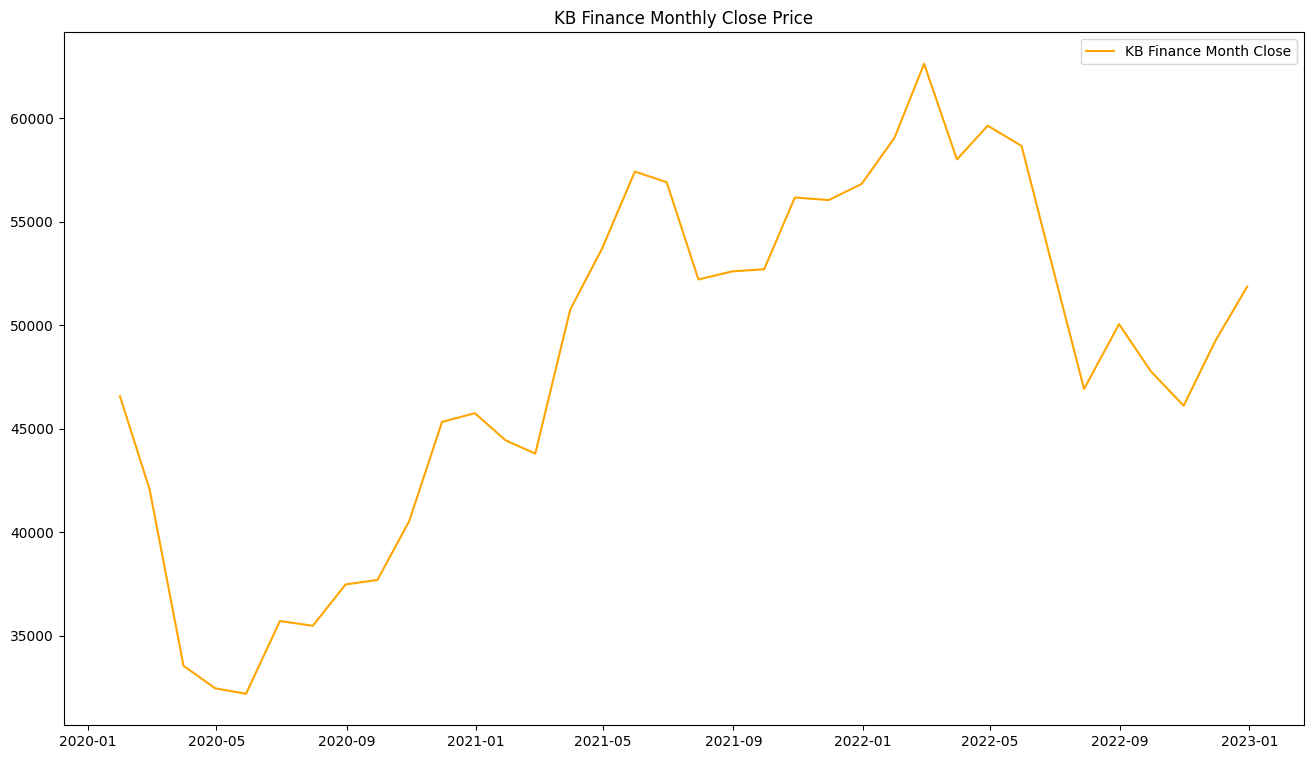

In [ ]:
# 월별 평균 주가 시각화
plt.figure(figsize=(16,9))
plt.plot(df_KB_month['Close'], color='orange', label='KB Finance Month Close')
plt.title("KB Finance Monthly Close Price")
plt.legend()
plt.show()

In [ ]:
# 월별 수익률 계산
df_KB_month['rtn'] = df_KB_month['Close'].pct_change()
df_KB_month.head()

,Open,High,Low,Close,Volume,Change,rtn
Date,,,,,,,
2020-01-31,46680.000000,47147.500000,46107.500000,46575.000000,1.062607e+06,-0.003912,NaN
2020-02-28,42207.500000,42590.000000,41552.500000,42075.000000,1.588716e+06,-0.005944,-0.096618
2020-03-31,33431.818182,34597.727273,32654.545455,33554.545455,2.532454e+06,-0.003363,-0.202506
2020-04-30,32517.500000,33165.000000,31847.500000,32462.500000,2.670384e+06,0.000952,-0.032545
2020-05-29,32318.421053,32728.947368,31852.631579,32202.631579,2.759411e+06,-0.000910,-0.008005


In [ ]:
# 이동평균선 계산
df_KB_month['MA2'] = df_KB_month['Close'].rolling(2).mean()
df_KB_month['MA3'] = df_KB_month['Close'].rolling(3).mean()

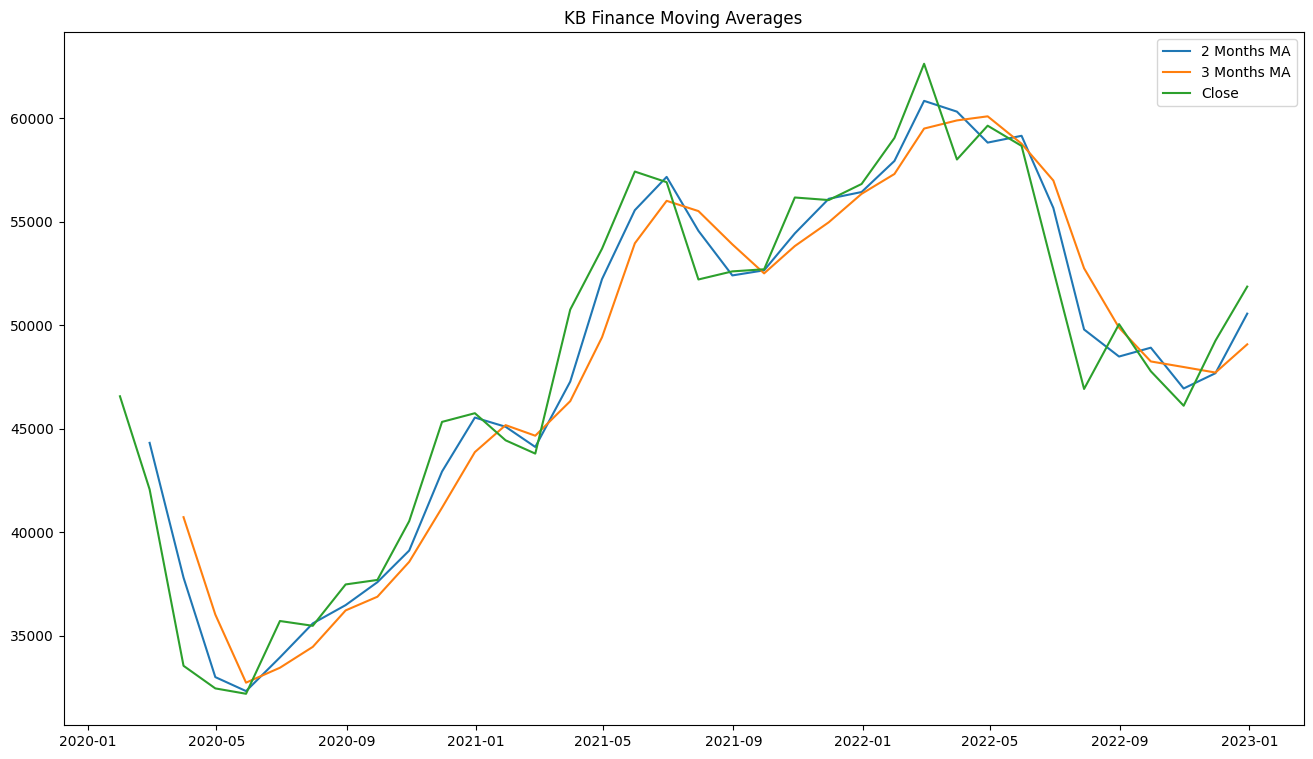

In [ ]:
# 이동평균선 시각화
plt.figure(figsize=(16,9))
plt.plot(df_KB_month['MA2'], label='2 Months MA')
plt.plot(df_KB_month['MA3'], label='3 Months MA')
plt.plot(df_KB_month['Close'], label='Close')
plt.title("KB Finance Moving Averages")
plt.legend()
plt.show()

In [ ]:
# 최근 가격과 이동평균선을 비교하여 시장 상태 판단
last_ma3 = df_KB_month['MA3'].iloc[-1]  # 최근 3개월 이동평균
print(last_ma3)
last_price = df_KB['Close'].iloc[-1]
print(last_price)

market_status = "변화없음"
if last_price > last_ma3:
    market_status = "상승 장"
elif last_price < last_ma3:
    market_status = "하락 장"

print(market_status)

49084.53140426825
48500
하락 장
